# AAAHHAHAHAHHHAHAHAA.

Hahaha.

Okay yeah, so I shouldn't be using a random forest model, I should be using a regression flavored, normal decision tree.  HERP.  Alright.  Well, I did some interesting things anyway, no regrets.  

-Won't have to worry about scaling.
-I can test w/ and w/o 'sex' column.
-Plenty of parameters to tune, and beware of overfitting.
-Use fixed version of X and y.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#Create dataframe
df = pd.read_csv('abalone.data')
df.columns = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']

df = pd.get_dummies(df, columns = ['sex'])
#df.drop('sex', axis=1, inplace=True)

y = df['rings']
X = df.drop('rings', axis=1)

Lessons from Documentation

max_depth controls fit.  Higher depth can lead to overfitting.
can try min_samples_leaf too.

In [22]:
#basics

regressor = DecisionTreeRegressor(random_state=0)

#So I've been farting up this line the whole time that's comforting.
#I want to use this train/test set the rest of the notebook.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg1 = regressor.fit(X_train, y_train)
score = reg1.score(X_test, y_test)
print(score)

0.110976782323


In [16]:
def regTree(X_train, X_test, y_train, y_test, depth, min_samples_split=2, min_samples_leaf=1):

    model = DecisionTreeRegressor(max_depth=depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=0)
    score = model.fit(X_train, y_train).score(X_test, y_test)
    
    return score

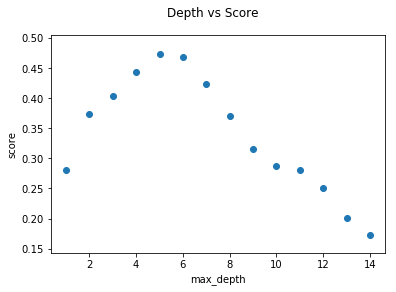

In [10]:
#testing max_depth
scores=[]
depths= list(range(1,15,1))

for depth in depths:
    score = regTree(X_train, X_test, y_train, y_test, depth)
    scores.append(score)

plt.scatter(x=depths, y=scores)
plt.suptitle('Depth vs Score')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

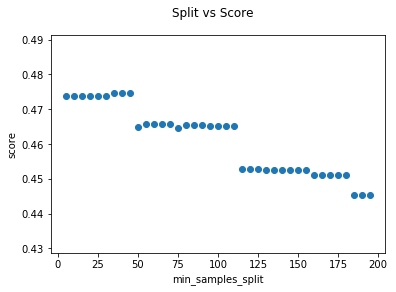

In [20]:
#Well, best depth looks like 5, so we'll stick with that for further testing.
#Testing min_samples_split 

split_scores=[]
splits= list(range(5,200,5))

for split in splits:
    score = regTree(X_train, X_test, y_train, y_test, 5, min_samples_split=split)
    split_scores.append(score)

plt.scatter(x=splits, y=split_scores)
plt.suptitle('Split vs Score')
plt.xlabel('min_samples_split')
plt.ylabel('score')
plt.show()

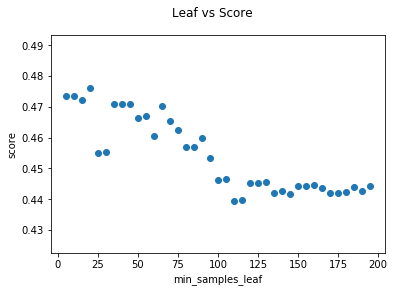

In [21]:
#Interesting.  Let's keep Split at default for now.
#Testing min_samples_leaf

#Well, best depth looks like 5, so we'll stick with that for further testing.
#Testing min_samples_split 

leaf_scores=[]
leaves = list(range(5,200,5))

for leaf in leaves:
    score = regTree(X_train, X_test, y_train, y_test, 5, min_samples_leaf=leaf)
    leaf_scores.append(score)

plt.scatter(x=leaves, y=leaf_scores)
plt.suptitle('Leaf vs Score')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.show()